#CDR DATASET


###Introduction
The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs).

###Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it.

The following activities are present in the dataset:

- received SMS
- sent SMS
- incoming calls
- outgoing calls
- Internet activity: In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection.

Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.


The datasets is spatially aggregated in a square cells grid. The area is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters.

This grid is projected with the WGS84 (EPSG:4326) standard. For more details, check out the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.


Learn More about: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

# Importing Dataset

- We are getting the dataset from Kaggle: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

### This is how you mount you kaggle to google colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# See My Medium Notebook for guidance:

#Method 2
import json
!pip install -q kaggle

# Step 2: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Step 3: Upload kaggle.json (contains your API credentials)
from google.colab import files
# files.upload()  # Upload kaggle.json manually

# Step 4: Move kaggle.json to the correct location in you drive
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Courses/Spring2026/MBD/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd       1813           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           200,000 Usd       1152           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                      2026-02-24 23:59:00  Featured           100,000 Usd         96           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding-2                       2026-03-25 23:59:00  Featured            75,000 Usd        682           False  
https://ww

In [6]:
#Method 1(better mosre secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip


Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 88% 212M/242M [00:00<00:00, 557MB/s] 
100% 242M/242M [00:00<00:00, 528MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-2

## Importing libraries

In [7]:
import pandas as pd
import numpy as np
import os

##Question:

- How many files are there in total?
- What do you notice about the file names?
- Why are there 7 files for SMS/calls/internet?
- What might 'mi-to-provinces' mean?
- Which is the largest file?

In [8]:
files = [f for f in os.listdir() if f.endswith('.csv') or f.endswith('.geojson')]
print('*'*70)
print(f"What does this folder contain: Found {len(files)} data files:")
print('*'*70)
for i, f in enumerate(sorted(files), 1):
    size = os.path.getsize(f) / 1024**2  # Size in MB
    print(f"  {i:2d}. {f:50s} ({size:6.2f} MB)")

**********************************************************************
What does this folder contain: Found 17 data files:
**********************************************************************
   1. ISTAT_census_variables_2011.csv                    (  0.08 MB)
   2. Italian_provinces.geojson                          (  7.66 MB)
   3. mi-to-provinces-2013-11-01.csv                     ( 94.09 MB)
   4. mi-to-provinces-2013-11-02.csv                     ( 93.68 MB)
   5. mi-to-provinces-2013-11-03.csv                     ( 86.78 MB)
   6. mi-to-provinces-2013-11-04.csv                     (133.25 MB)
   7. mi-to-provinces-2013-11-05.csv                     (137.29 MB)
   8. mi-to-provinces-2013-11-06.csv                     (137.76 MB)
   9. mi-to-provinces-2013-11-07.csv                     (136.75 MB)
  10. milano-grid.geojson                                (  3.02 MB)
  11. sms-call-internet-mi-2013-11-01.csv                ( 79.40 MB)
  12. sms-call-internet-mi-2013-11-02.csv      

### Lets LOAD and explore one day of activity

In [9]:
cdr_df = pd.read_csv("sms-call-internet-mi-2013-11-01.csv")
cdr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891928 entries, 0 to 1891927
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   datetime     object 
 1   CellID       int64  
 2   countrycode  int64  
 3   smsin        float64
 4   smsout       float64
 5   callin       float64
 6   callout      float64
 7   internet     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 115.5+ MB


In [10]:
print("\nFirst 10 rows:")
cdr_df.head(10)


First 10 rows:


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
3,2013-11-01 00:00:00,2,0,0.3581,NaN,NaN,0.0273,NaN
4,2013-11-01 00:00:00,2,33,NaN,NaN,NaN,NaN,0.0274
5,2013-11-01 00:00:00,2,39,1.7334,1.0880,0.6020,0.4109,57.8875
6,2013-11-01 00:00:00,3,0,0.3644,NaN,NaN,0.0273,NaN
7,2013-11-01 00:00:00,3,33,NaN,NaN,NaN,NaN,0.0287
8,2013-11-01 00:00:00,3,39,1.7348,1.0701,0.6128,0.4203,58.0095
9,2013-11-01 00:00:00,4,0,0.3349,NaN,NaN,0.0273,NaN


In [11]:
# Basic exploration
print(f"\nDataset Shape: {cdr_df.shape[0]:,} rows × {cdr_df.shape[1]} columns")

print(f"\nColumns:")
for col in cdr_df.columns:
    print(f"   - {col}")

print("\n Data types:")
print(cdr_df.dtypes)

print(f"\n Data description:")
cdr_df.describe()



Dataset Shape: 1,891,928 rows × 8 columns

Columns:
   - datetime
   - CellID
   - countrycode
   - smsin
   - smsout
   - callin
   - callout
   - internet

 Data types:
datetime        object
CellID           int64
countrycode      int64
smsin          float64
smsout         float64
callin         float64
callout        float64
internet       float64
dtype: object

 Data description:


,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.891928e+06,1.891928e+06,805775.000000,469482.000000,484147.000000,854515.000000,804854.000000
mean,5.277812e+03,3.538213e+02,5.716717,6.011796,5.417363,3.741025,102.477277
std,2.719573e+03,4.287521e+03,15.503784,16.953823,15.915312,13.986531,342.024253
min,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.153000e+03,3.300000e+01,0.129300,0.109600,0.075200,0.060700,0.058300
50%,5.387000e+03,4.100000e+01,0.772400,0.755200,0.385000,0.236900,0.230200
75%,7.492000e+03,8.600000e+01,4.468400,4.627375,3.179100,1.206000,42.447725
max,1.000000e+04,9.725900e+04,1109.082000,1577.903800,988.576700,1024.899200,27774.298900


###Question:
- What does each row represent?

###Lets dive enven deeper intor the data exploration

In [12]:
# Let's understand the structure better

print("\n" + "="*70)
print("UNDERSTANDING THE DATA STRUCTURE")
print("="*70)

# How many unique grid squares?
print(f"\nAll non-unique grid squares (CID): {len(cdr_df['CellID'])}")

print(f"All Unique grid squares (CID): {cdr_df['CellID'].nunique()}")
'''Could still have this with this
print(f"How many different CID are there:{len(cdr_df['CellID'].value_counts())}")'''

# Let's look at one grid square
sample_cid = cdr_df['CellID'].iloc[0]
print(f"\nSample grid square: {sample_cid}\n")

#we look only at a unique grip sqaure (CID=1)
print(f"\nSample grid square for CID= 1 only")
single_cid_1=cdr_df[cdr_df['CellID'] == sample_cid]
single_cid_1


UNDERSTANDING THE DATA STRUCTURE

All non-unique grid squares (CID): 1891928
All Unique grid squares (CID): 10000

Sample grid square: 1


Sample grid square for CID= 1 only


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [13]:
#double checking that we are dealing with only one CID
cdr_df[cdr_df['CellID'] == sample_cid].CellID.value_counts()

,count
CellID,
1,114


##Question:
- What are the different activities in the CDR
- This CDR comprises call to and from which countires, list them all
- How many of these call were incoming, how many were outgoing?

##Lets focus on a single grid CID 1 for now

In [14]:
single_cid_1

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-01 00:00:00,1,0,0.3521,NaN,NaN,0.0273,NaN
1,2013-11-01 00:00:00,1,33,NaN,NaN,NaN,NaN,0.0261
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54581,2013-11-01 01:00:00,1,0,0.1378,NaN,NaN,0.0309,NaN
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
...,...,...,...,...,...,...,...,...
1757405,2013-11-01 22:00:00,1,48,0.0261,NaN,NaN,NaN,NaN
1829008,2013-11-01 23:00:00,1,0,0.4205,NaN,NaN,0.0523,NaN
1829009,2013-11-01 23:00:00,1,1,0.0261,NaN,NaN,NaN,NaN
1829010,2013-11-01 23:00:00,1,39,1.8767,1.4788,0.3539,0.6070,58.8158


In [15]:
sms_out =  single_cid_1['smsout'].notna()
sms_outgoing = single_cid_1[sms_out]
print(f"   The Shape of the datasets with non Nan Outgoing call only: {sms_outgoing.shape}")
sms_outgoing

   The Shape of the datasets with non Nan Outgoing call only: (35, 8)


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
2,2013-11-01 00:00:00,1,39,1.7322,1.1047,0.5919,0.4020,57.7729
54582,2013-11-01 01:00:00,1,39,1.0259,0.7700,0.1906,0.1633,44.0469
100058,2013-11-01 02:00:00,1,39,0.3883,0.3004,0.0279,0.1360,41.1798
138762,2013-11-01 03:00:00,1,39,1.1248,0.8957,0.0018,0.0261,33.0221
177160,2013-11-01 04:00:00,1,39,0.3491,0.5112,0.0054,0.0261,31.3769
215340,2013-11-01 05:00:00,1,39,0.1135,0.1954,0.0279,0.1319,34.8155
257255,2013-11-01 06:00:00,1,39,0.1093,0.1158,0.2168,0.1045,35.4161
306793,2013-11-01 07:00:00,1,39,0.5813,0.2447,0.2435,0.4946,42.9335
369987,2013-11-01 08:00:00,1,0,1.4571,0.0273,0.0523,0.0179,NaN
369988,2013-11-01 08:00:00,1,39,2.2078,1.4093,1.1086,1.2328,59.8808


#Lets visualize

In [16]:
#converting the datetime into day, month, year,hour, ninutes, secons
sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type

sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
sms_outgoing['hour'] = sms_outgoing['datetime'].dt.hour
sms_outgoing.columns

/tmp/ipython-input-457596189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['datetime'] = pd.to_datetime(sms_outgoing['datetime']) #converting it into a datefime type
/tmp/ipython-input-457596189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_outgoing['date'] = sms_outgoing['datetime'].dt.date
/tmp/ipython-input-457596189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

Index(['datetime', 'CellID', 'countrycode', 'smsin', 'smsout', 'callin',
       'callout', 'internet', 'date', 'hour'],
      dtype='object')

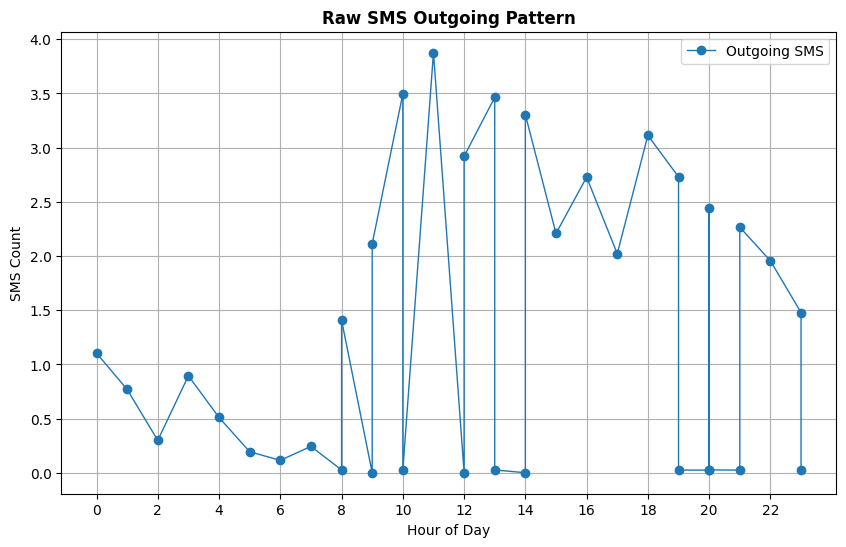

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))


# Plot 1: Raw data
plt.plot(sms_outgoing['hour'], sms_outgoing['smsout'], marker='o', linewidth=1, markersize=6, label='Outgoing SMS')
plt.title('Raw SMS Outgoing Pattern', fontweight='bold', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('SMS Count')
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.legend();


## Hand on : Pick a different grid square and find its peak SMS hour.

#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

## Assignment Answers

## TASK 1: Loading and Merging data

In [18]:
# 1. Loading the three specific datasets
files = [
    'sms-call-internet-mi-2013-11-02.csv',
    'sms-call-internet-mi-2013-11-04.csv',
    'sms-call-internet-mi-2013-11-06.csv'
]

df_list = [pd.read_csv(f) for f in files]
df = pd.concat(df_list, ignore_index=True)

In [19]:
# 2. Adding Date and Time columns
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.date

In [20]:
# 3. Handling Missing Values
# Identifying modified records before filling
null_counts = df.isnull().sum()
total_records_modified = df.isnull().any(axis=1).sum()

# Filling NaN with mean
df = df.fillna(df.mean(numeric_only=True))

In [21]:
# 4. Adding aggregate columns
df['total_sms'] = df['smsin'] + df['smsout']
df['total_calls'] = df['callin'] + df['callout']
df['total_internet'] = df['internet']
df['total_activity'] = df['total_sms'] + df['total_calls'] + df['total_internet']

## Answering the questions

In [22]:
# Counting
print(f"Total records across all 3 datasets: {len(df)}")
print(f"Unique CellIDs: {df['CellID'].nunique()}")
print(f"Unique Country Codes: {df['countrycode'].nunique()}")
print(f"Most common missing values column: {null_counts.idxmax()}")
print(f"Total records modified: {total_records_modified}")

Total records across all 3 datasets: 6564031
Unique CellIDs: 10000
Unique Country Codes: 302
Most common missing values column: smsout
Total records modified: 5880441


In [23]:
# Timing activities
hourly_activity = df.groupby('hour')['total_activity'].sum()
print(f"Peak Hour: {hourly_activity.idxmax()}")
print(f"Lowest Activity Hour: {hourly_activity.idxmin()}")

Peak Hour: 17
Lowest Activity Hour: 4


In [24]:
# Statistics for Total Calls by Hour
hourly_calls_stats = df.groupby('hour')['total_calls'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nHourly Call Statistics:\n", hourly_calls_stats)


Hourly Call Statistics:
            mean     median        std     min        max
hour                                                    
0     10.280157  13.425298   5.279040  0.0002   223.4941
1      9.928661  13.425298   5.129893  0.0000   141.9847
2      9.894713  13.425298   5.329786  0.0000   210.9691
3      9.953373  13.425298   5.649571  0.0000   298.3541
4     10.235666  13.425298   5.294288  0.0000   255.0555
5     10.029019  13.425298   5.395003  0.0000   177.1690
6     10.339697  13.425298   4.969421  0.0002   201.3488
7     11.464472  13.425298   8.435423  0.0000   412.7314
8     13.272816  13.425298  22.237365  0.0000  1122.7091
9     14.508306  13.425298  35.498836  0.0000  1972.8289
10    14.923601   9.520804  41.338244  0.0000  2402.6425
11    15.033117   8.908054  43.038147  0.0000  2565.0524
12    14.506823   8.501204  41.418042  0.0000  2724.3738
13    13.988444   8.527204  37.615605  0.0000  2464.7908
14    14.187473   8.519104  38.677742  0.0000  2333.5641
15   

In [25]:
# Daytime vs Nighttime
daytime = df[df['hour'].between(6, 19)]['total_activity'].sum()
nighttime = df[~df['hour'].between(6, 19)]['total_activity'].sum()
total = df['total_activity'].sum()
print(f"Daytime %: {(daytime/total)*100:.2f}%")
print(f"Nighttime %: {(nighttime/total)*100:.2f}%")

Daytime %: 73.55%
Nighttime %: 26.45%


In [26]:
# Domestic (Italy code: 39) vs International
domestic = df[df['countrycode'] == 39]
international = df[df['countrycode'] != 39]

Domestic Call %: 33.11%
Intl Call %: 66.89%
Intl SMS %: 75.02%
International Incoming/Outgoing Ratio: 1.67


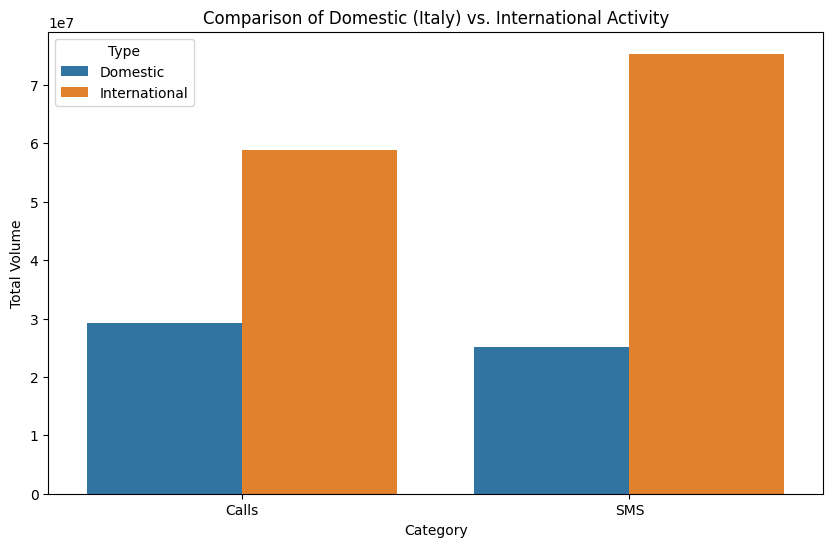

In [29]:
## Comparison
import matplotlib.pyplot as plt
import seaborn as sns

# Call Ratios
total_c = df['total_calls'].sum()
print(f"Domestic Call %: {(domestic['total_calls'].sum()/total_c)*100:.2f}%")
print(f"Intl Call %: {(international['total_calls'].sum()/total_c)*100:.2f}%")

# SMS Ratios
total_s = df['total_sms'].sum()
print(f"Intl SMS %: {(international['total_sms'].sum()/total_s)*100:.2f}%")

# International Incoming vs Outgoing Ratio
intl_ratio = international['callin'].sum() / international['callout'].sum()
print(f"International Incoming/Outgoing Ratio: {intl_ratio:.2f}")

# Visualization 1 (bar chart): Domestic vs International Activity Comparison
comparison_data = {
    'Category': ['Calls', 'Calls', 'SMS', 'SMS'],
    'Type': ['Domestic', 'International', 'Domestic', 'International'],
    'Volume': [
        domestic['total_calls'].sum(),
        international['total_calls'].sum(),
        domestic['total_sms'].sum(),
        international['total_sms'].sum()
    ]
}
comp_df = pd.DataFrame(comparison_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Volume', hue='Type', data=comp_df)
plt.title('Comparison of Domestic (Italy) vs. International Activity')
plt.ylabel('Total Volume')
plt.show()

Correlation between SMS and Calls: 0.89


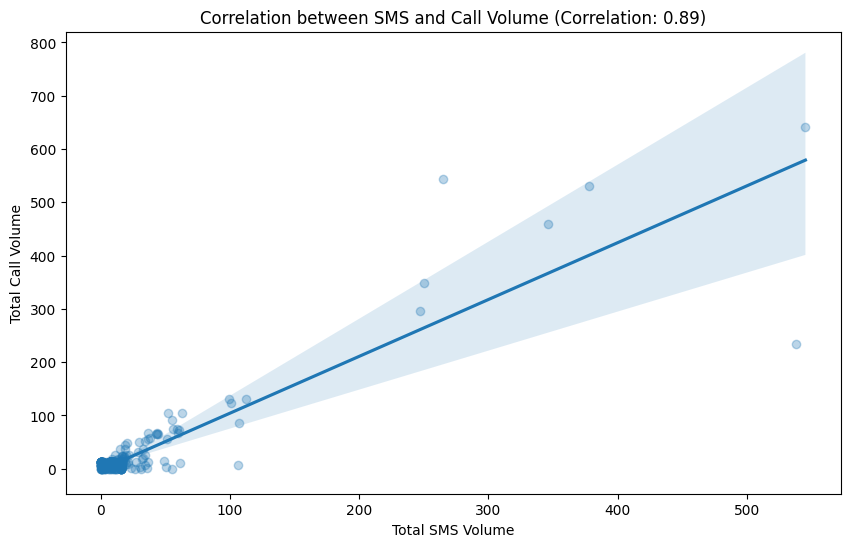

In [30]:
# Correlation between SMS volume and Call volume at the grid level
correlation = df[['total_sms', 'total_calls']].corr().iloc[0,1]
print(f"Correlation between SMS and Calls: {correlation:.2f}")

# Visualization 2 (scatter plot): Correlation between SMS and Call Volume
plt.figure(figsize=(10, 6))
# Sampling data for better performance if the dataset is massive
sample_df = df.sample(1000)
sns.regplot(x='total_sms', y='total_calls', data=sample_df, scatter_kws={'alpha':0.3})
plt.title(f'Correlation between SMS and Call Volume (Correlation: {correlation:.2f})')
plt.xlabel('Total SMS Volume')
plt.ylabel('Total Call Volume')
plt.show()